## In this notebook we do the 2D zip2vec projection

In [285]:
from sklearn.decomposition import PCA
import numpy as np
import scipy.spatial as scisp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [232]:
zip2vec = np.load("zip2vec.npy")
indices = np.load("indices.npy")
zipcodes = np.load("zipcodes.npy")

In [49]:
zip2idx = {z : i for z, i in zip(zipcodes, indices)}
idx2zip = {i : z for i, z in zip(indices, zipcodes)}

## Basically we just use sklearn.pca and apply the transformation. The result is amazingly good. 

In [245]:
data = pd.read_csv("data2.csv", index_col = 0)

C:\Users\pixin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [246]:
append0 = np.vectorize(lambda x : str(x) if len(str(x)) == 5 else "0" + str(x))
data["zip"] = append0(data["zip"])

In [154]:
large_city_zip = data[data["city scale"] == "large"]["zip"].unique()
large_city_idx = [zip2idx[z] for z in large_city_zip]
large_city_vec = zip2vec[large_city_idx]

In [151]:
med_city_zip = data[data["city scale"] == "medium"]["zip"].unique()
med_city_idx = [zip2idx[z] for z in med_city_zip]
med_city_vec = zip2vec[med_city_idx]

In [160]:
small_city_zip = data[data["city scale"] == "small"]["zip"].unique()
small_city_idx = [zip2idx[z] for z in small_city_zip]
small_city_vec = zip2vec[small_city_idx]

In [153]:
tiny_city_zip = data[data["city scale"] == "tiny"]["zip"].unique()
tiny_city_idx = [zip2idx[z] for z in tiny_city_zip]
tiny_city_vec = tiny_city_vec = zip2vec[tiny_city_idx]

Text(0, 0.5, 'Second Principle Component')

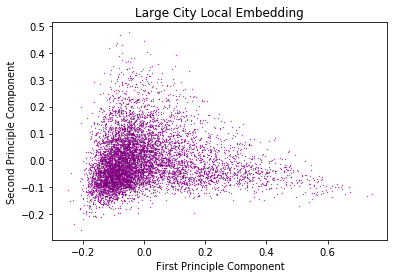

In [301]:
pca = PCA(n_components=2)
pca.fit(large_city_vec)
x, y = pca.transform(large_city_vec)[:, 0], pca.transform(large_city_vec)[:, 1]
plt.scatter(x, y, s = 0.1, c = "purple")
plt.title("Large City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

Text(0, 0.5, 'Second Principle Component')

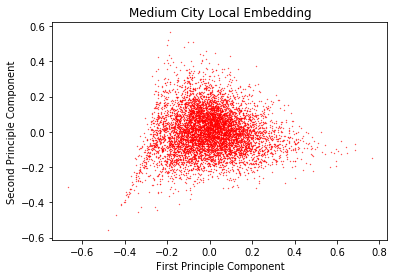

In [302]:
pca = PCA(n_components=2)
pca.fit(med_city_vec)
x, y = pca.transform(med_city_vec)[:, 0], pca.transform(med_city_vec)[:, 1]
# x_max = np.argmax(x)
# y_max = np.argmax(y)

plt.scatter(x, y, s = 0.1, c = "red")
plt.title("Medium City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

Text(0, 0.5, 'Second Principle Component')

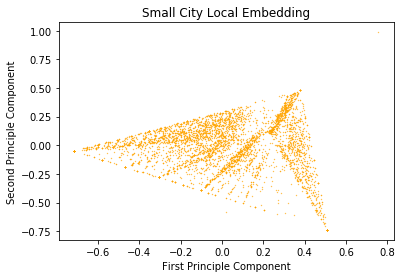

In [312]:
pca = PCA(n_components=2)
pca.fit(small_city_vec)
x, y = pca.transform(small_city_vec)[:, 0], pca.transform(small_city_vec)[:, 1]
plt.scatter(x, y, s = 0.1, c = "orange")
plt.title("Small City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")


Text(0, 0.5, 'Second Principle Component')

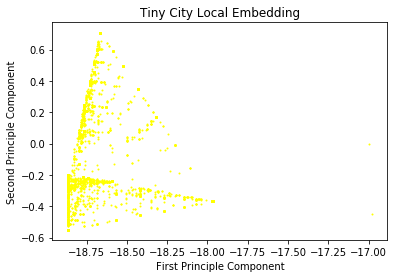

In [327]:
pca = PCA(n_components=2)
pca.fit(tiny_city_vec)
x, y = pca.transform(tiny_city_vec)[:, 0], pca.transform(tiny_city_vec)[:, 1]
x[972] = -17.0
plt.scatter(x, y, s = 1, c = "yellow")
plt.title("Tiny City Local Embedding")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

In [290]:
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]["ESTAB"]
# # plt.hist(temp)
dist = dict(temp.value_counts())
l = sorted(dist.items(), key = lambda x : x[0])
num = [pair[0] for pair in l]
count = [pair[1] for pair in l]

# print(np.array(dist.values))
# count
y = np.cumsum(count)
cdf = y / y[-1]


#### Equal Breath Binning
## 25 th percentile 
num=np.array(num)
per_25 = 3
## 50 th percentile
per_50 = num[abs(cdf - 0.50) < 0.003][0]

## 75 th percentile
per_75 = num[abs(cdf - 0.75) < 0.001][0]




temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]
scale_labeling = np.vectorize(lambda x : "tiny" if x <= per_25 else ("small" if x <= per_50 else ("medium" if x < per_75 else "large")))
scale = scale_labeling(temp["ESTAB"])
zips = temp["zip"]
zip2scale = {z : s for z, s in zip(zips, scale)}

In [291]:
# color_arr = []
scale = [zip2scale[idx2zip[i]] for i in range(len(idx2zip))]
choose_color = np.vectorize(lambda x : "yellow" if x == "tiny" else("orange" if x == "small"
                                                               else ("red" if x == "medium" else "purple")))
colors = choose_color(scale)

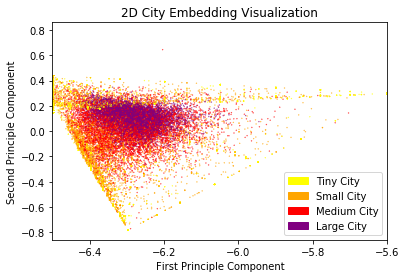

In [292]:
##### pca = PCA(n_components=2)
pca.fit(zip2vec)
x, y = pca.transform(zip2vec)[:, 0], pca.transform(zip2vec)[:, 1]

x[3240] = -3.20
y[3240]
plt.scatter(x, y, s = 0.1, c=colors)
plt.xlim(-6.5, -5.6)
plt.title("2D City Embedding Visualization")
yellow_patch = mpatches.Patch(color='yellow', label='Tiny City')
orange_patch = mpatches.Patch(color="orange", label="Small City")
red_patch = mpatches.Patch(color='red', label='Medium City')
purple_patch = mpatches.Patch(color='purple', label='Large City')
plt.legend(handles=[yellow_patch, orange_patch,red_patch, purple_patch])
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.savefig("2d_pca.png")